# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 12</span>

### Esercizio 12.1

Lo scopo di questo esercizio è quello di testare quattro ottimizzatori (compreso quello SGD) su una rete DNN.

#### SGD optimizer

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 492us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/5
60000/60000 [==============================] - 32s 529us/step - loss: 0.3794 - accuracy: 0.8925 - val_loss: 0.2352 - val_accuracy: 0.9346
Epoch 3/5
60000/60000 [==============================] - 33s 545us/step - loss: 0.3057 - accuracy: 0.9133 - val_loss: 0.1996 - val_accuracy: 0.9408
Epoch 4/5
60000/60000 [==============================] - 35s 584us/step - loss: 0.2664 - accuracy: 0.9254 - val_loss: 0.1729 - val_accuracy: 0.9494
Epoch 5/5
10000/10000 [==============================] - 3s 270us/step

Test loss: 0.1540919346794486
Test accuracy: 0.953499972820282


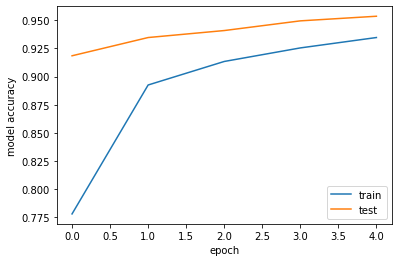

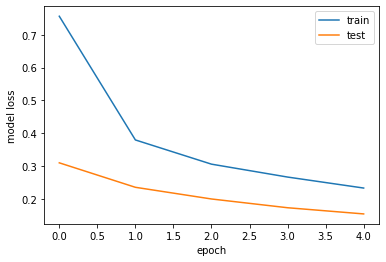

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In questo caso l'accuratezza dei dati di train è minore di quelli di test

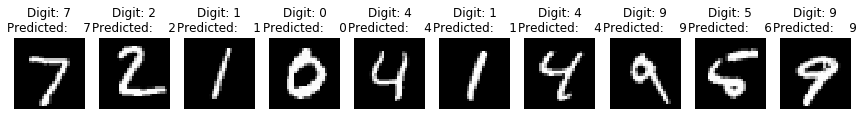

In [3]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


#### ottimizzatore Adagrad 

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 554us/step - loss: 0.2778 - accuracy: 0.9182 - val_loss: 0.1254 - val_accuracy: 0.9608
Epoch 2/5
60000/60000 [==============================] - 37s 614us/step - loss: 0.1428 - accuracy: 0.9602 - val_loss: 0.0950 - val_accuracy: 0.9699
Epoch 3/5
60000/60000 [==============================] - 41s 682us/step - loss: 0.1114 - accuracy: 0.9683 - val_loss: 0.0834 - val_accuracy: 0.9738
Epoch 4/5
60000/60000 [==============================] - 45s 743us/step - loss: 0.0948 - accuracy: 0.9737 - val_loss: 0.0759 - val_accuracy: 0.9755
Epoch 5/5
10000/10000 [==============================] - 3s 310us/step

Test loss: 0.0698532811986981
Test accuracy: 0.978600025177002


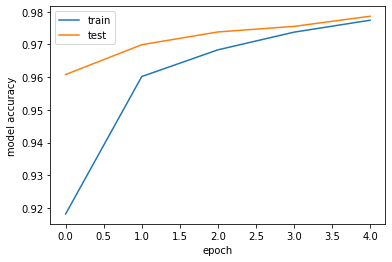

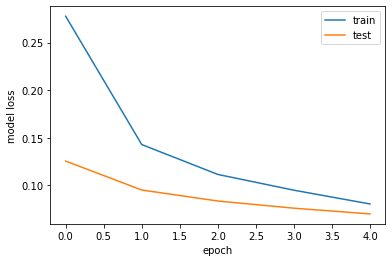

In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adagrad(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

L'ottimizzatore Adagrad ha prestazioni migliori rispetto al precedente.

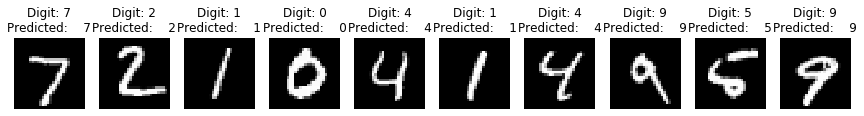

In [6]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


#### ottimizzatore Adadelta

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 878us/step - loss: 0.2926 - accuracy: 0.9128 - val_loss: 0.1151 - val_accuracy: 0.9643
Epoch 2/5
60000/60000 [==============================] - 55s 911us/step - loss: 0.1281 - accuracy: 0.9641 - val_loss: 0.0816 - val_accuracy: 0.9754
Epoch 3/5
60000/60000 [==============================] - 54s 898us/step - loss: 0.0905 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9781
Epoch 4/5
60000/60000 [==============================] - 48s 797us/step - loss: 0.0745 - accuracy: 0.9791 - val_loss: 0.0782 - val_accuracy: 0.9785
Epoch 5/5
10000/10000 [==============================] - 2s 233us/step

Test loss: 0.07170092756116356
Test accuracy: 0.9807000160217285


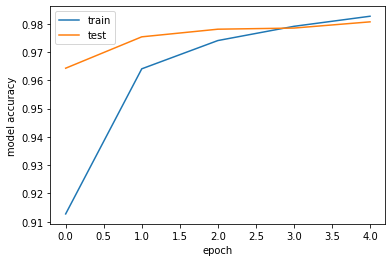

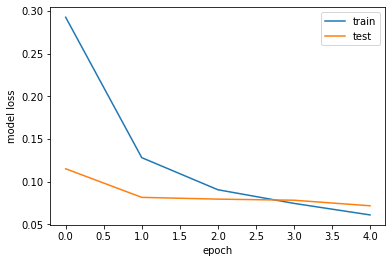

In [30]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()



Le prestazioni sono simili a quelle ottenute con l'ottimizzatore Adagrad, con l'unica differenza che l'accuratezza è migliore con il set di train rispetto al set test.

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


#### Ottimizzatore Adamax 

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
after to_categorical
X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 709us/step - loss: 0.3330 - accuracy: 0.9024 - val_loss: 0.1404 - val_accuracy: 0.9569
Epoch 2/5
60000/60000 [==============================] - 41s 691us/step - loss: 0.1532 - accuracy: 0.9571 - val_loss: 0.0960 - val_accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 29s 479us/step - loss: 0.1069 - accuracy: 0.9692 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 4/5
60000/60000 [==============================] - 27s 456us/step - loss: 0.0860 - accuracy: 0.9758 - val_loss: 0.0681 - val_accuracy: 0.9791
Epoch 5/5
10000/10000 [==============================] - 2s 166us/step

Test loss: 0.06461143579699564
Test accuracy: 0.9807999730110168


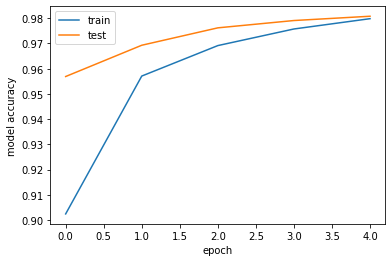

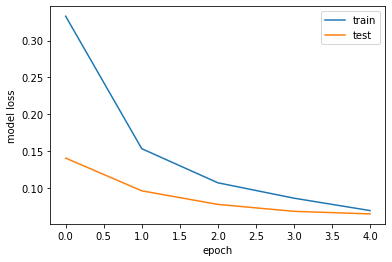

In [7]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print("after to_categorical")
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adamax(),metrics=['accuracy'])
    return model

batch_size = 32
epochs = 5
model_DNN = compile_model()
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Quest'ultimo ha buone prestazioni.

In [ ]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


### Esercizio 12.2

Dopo diversi tentativi la rete CNN che ha le migliori prestazioni tra quelle provate è costituita da:
- un layer di convoluione fatto di 20 filtri
- un layer di pooling ( maxpooling 2x2)
- un layer di convoluzione fatto di 25 filtri
- un layer di pooling (maxpooling 2x2)
- un "flatten layer" 
- un "dense layer" di 30 neuroni
- un layer di output con 10 neuroni 

Da quello che si osserva alla fine si ha un buon riconoscimento delle cifre

In [7]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [10]:
def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(25, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 162s 3ms/step - loss: 0.4513 - accuracy: 0.8665 - val_loss: 0.1444 - val_accuracy: 0.9551
Epoch 2/5
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1316 - accuracy: 0.9598 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 3/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0954 - accuracy: 0.9714 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 5/5
10000/10000 [==============================] - 6s 648us/step

Test loss: 0.05425311053525656
Test accuracy: 0.9824000000953674


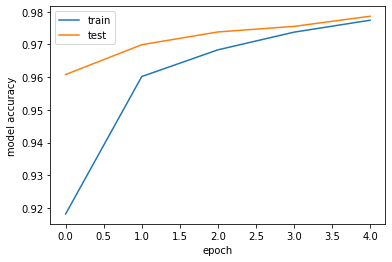

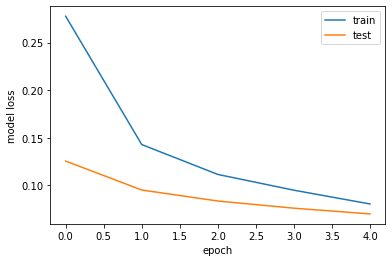

In [11]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

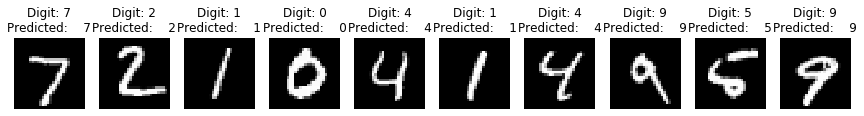

In [11]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Es 12.3

In questa ultima sezione si è testata la rete precedente con cifre scritte dal sottoscritto ottenedo un buon risultato.

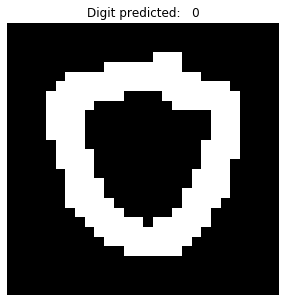

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

digit_filename = "9.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data = data.reshape(1,xdim*ydim)
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred_0 = model_CNN.predict(data)
data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:   {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()
